In [ ]:
import numpy as np

import pandas as pd
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt


#reading the dataset
df=pd.read_csv("/content/drive/MyDrive/Thesis Thinngs/wesad_swell_comb_label.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527288 entries, 0 to 527287
Data columns (total 64 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   MEAN_RR                   527288 non-null  float64
 1   MEDIAN_RR                 527288 non-null  float64
 2   SDRR                      527288 non-null  float64
 3   RMSSD                     527288 non-null  float64
 4   SDSD                      527288 non-null  float64
 5   SDRR_RMSSD                527288 non-null  float64
 6   HR                        527288 non-null  float64
 7   pNN25                     527288 non-null  float64
 8   pNN50                     527288 non-null  float64
 9   SD1                       527288 non-null  float64
 10  SD2                       527288 non-null  float64
 11  KURT                      527288 non-null  float64
 12  SKEW                      527288 non-null  float64
 13  MEAN_REL_RR               527288 non-null  f

In [ ]:
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR_LOG,MEAN_RR_SQRT,TP_SQRT,MEDIAN_REL_RR_LOG,RMSSD_REL_RR_LOG,SDSD_REL_RR_LOG,VLF_LOG,LF_LOG,HF_LOG,TP_LOG,LF_HF_LOG,RMSSD_LOG,SDRR_RMSSD_LOG,pNN25_LOG,pNN50_LOG,SD1_LOG,KURT_YEO_JONSON,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,LF_BOXCOX,HF_BOXCOX,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,condition,condition_label
0,1183.843150,1181.251800,365.254689,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,516.420570,-0.373785,-0.385042,0.000489,-0.000682,0.020493,0.011213,0.011213,1.827570,-0.373785,-0.385042,6074.759991,93.166507,418.585262,6.419698,93.944607,26.980773,0.413795,6.055393,6520.326026,15.514206,0.064457,7.077366,34.407022,80.748536,-0.000683,0.011151,0.011151,8.712062,6.039267,3.331518,8.782833,2.804221,2.846786,3.157073,2.439444,0.875469,2.524061,-0.437762,-0.402175,0.000429,-0.402175,5.969075,6.047394,57.119810,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,stress,stress
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,141.337907,-0.380545,-0.046871,-0.000026,-0.002017,0.021379,0.009455,0.009455,2.261110,-0.380545,-0.046871,2635.166019,58.666097,1849.940776,41.184808,99.639291,6.697061,0.149095,0.360709,4491.803856,276.231752,0.003620,6.929558,31.953746,67.020921,-0.002019,0.009411,0.009411,7.877081,7.523449,2.040839,8.410232,5.624854,3.116232,1.733800,3.237370,1.098612,2.788164,-0.484715,-0.044256,-0.000026,-0.044256,17010.941850,2.029246,7757.321073,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,no stress,no stress
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,152.086226,0.795182,-0.883129,-0.000236,-0.002134,0.021503,0.009040,0.009040,2.378754,0.795182,-0.883129,1432.340330,41.644429,1987.435700,57.783492,99.019666,19.676393,0.572079,0.980334,3439.452423,101.006099,0.009900,6.710690,28.638037,58.646845,-0.002136,0.008999,0.008999,7.267763,7.595104,3.028993,8.143358,4.625033,2.894660,1.990218,2.671847,0.470004,2.571003,0.458363,-0.549709,-0.000213,-0.549709,0.677698,1.197767,0.629808,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,stress,stress
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,180.359637,0.684130,-0.322346,-0.000229,-0.000589,0.022966,0.012660,0.012660,1.814036,0.684130,-0.322346,4797.649891,82.403871,949.060452,16.300951,92.639413,75.406806,1.295178,7.360587,5822.117149,12.585873,0.079454,6.575633,26.765648,76.302799,-0.000589,0.012580,0.012580,8.476090,6.856526,4.336072,8.669591,2.609030,2.823535,2.204837,2.439444,0.470004,2.501542,0.501366,-0.339236,-0.000231,-0.339236,1.329204,2.163583,2.352294,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,no stress,no stress
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,510.768116,-1.126756,-0.058487,0.000637,0.000237,0.020838,0.012575,0.012575,1.657112,-1.126756,-0.058487,5728.252158,92.169826,457.885200,7.367553,94.091814,28.751397,0.462621,5.908186,6214.888755,15.925668,0.062792,6.885925,31.263503,78.834566,0.000237,0.012497,0.012497,8.653340,6.128800,3.392876,8.734864,2.828831,2.742851,3.252684,2.079442,0.847298,2.422322,-1.524474,-0.059619,0.000618,-0.059619,13.101780,6.459329,2.467751,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,stress,stress


In [ ]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['condition_label']= label_encoder.fit_transform(df['condition_label']) 
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR_LOG,MEAN_RR_SQRT,TP_SQRT,MEDIAN_REL_RR_LOG,RMSSD_REL_RR_LOG,SDSD_REL_RR_LOG,VLF_LOG,LF_LOG,HF_LOG,TP_LOG,LF_HF_LOG,RMSSD_LOG,SDRR_RMSSD_LOG,pNN25_LOG,pNN50_LOG,SD1_LOG,KURT_YEO_JONSON,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,LF_BOXCOX,HF_BOXCOX,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,condition,condition_label
0,1183.843150,1181.251800,365.254689,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,516.420570,-0.373785,-0.385042,0.000489,-0.000682,0.020493,0.011213,0.011213,1.827570,-0.373785,-0.385042,6074.759991,93.166507,418.585262,6.419698,93.944607,26.980773,0.413795,6.055393,6520.326026,15.514206,0.064457,7.077366,34.407022,80.748536,-0.000683,0.011151,0.011151,8.712062,6.039267,3.331518,8.782833,2.804221,2.846786,3.157073,2.439444,0.875469,2.524061,-0.437762,-0.402175,0.000429,-0.402175,5.969075,6.047394,57.119810,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,stress,1
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,141.337907,-0.380545,-0.046871,-0.000026,-0.002017,0.021379,0.009455,0.009455,2.261110,-0.380545,-0.046871,2635.166019,58.666097,1849.940776,41.184808,99.639291,6.697061,0.149095,0.360709,4491.803856,276.231752,0.003620,6.929558,31.953746,67.020921,-0.002019,0.009411,0.009411,7.877081,7.523449,2.040839,8.410232,5.624854,3.116232,1.733800,3.237370,1.098612,2.788164,-0.484715,-0.044256,-0.000026,-0.044256,17010.941850,2.029246,7757.321073,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,no stress,0
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,152.086226,0.795182,-0.883129,-0.000236,-0.002134,0.021503,0.009040,0.009040,2.378754,0.795182,-0.883129,1432.340330,41.644429,1987.435700,57.783492,99.019666,19.676393,0.572079,0.980334,3439.452423,101.006099,0.009900,6.710690,28.638037,58.646845,-0.002136,0.008999,0.008999,7.267763,7.595104,3.028993,8.143358,4.625033,2.894660,1.990218,2.671847,0.470004,2.571003,0.458363,-0.549709,-0.000213,-0.549709,0.677698,1.197767,0.629808,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,stress,1
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,180.359637,0.684130,-0.322346,-0.000229,-0.000589,0.022966,0.012660,0.012660,1.814036,0.684130,-0.322346,4797.649891,82.403871,949.060452,16.300951,92.639413,75.406806,1.295178,7.360587,5822.117149,12.585873,0.079454,6.575633,26.765648,76.302799,-0.000589,0.012580,0.012580,8.476090,6.856526,4.336072,8.669591,2.609030,2.823535,2.204837,2.439444,0.470004,2.501542,0.501366,-0.339236,-0.000231,-0.339236,1.329204,2.163583,2.352294,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,no stress,0
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,510.768116,-1.126756,-0.058487,0.000637,0.000237,0.020838,0.012575,0.012575,1.657112,-1.126756,-0.058487,5728.252158,92.169826,457.885200,7.367553,94.091814,28.751397,0.462621,5.908186,6214.888755,15.925668,0.062792,6.885925,31.263503,78.834566,0.000237,0.012497,0.012497,8.653340,6.128800,3.392876,8.734864,2.828831,2.742851,3.252684,2.079442,0.847298,2.422322,-1.524474,-0.059619,0.000618,-0.059619,13.101780,6.459329,2.467751,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,stress,1


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, stratify = df['condition'],
    train_size=0.7,
    random_state=21)

In [ ]:
print(test.shape)
print(train.shape)

(158187, 64)
(369101, 64)


In [ ]:
X_train=train.drop(labels=['condition',"condition_label"], axis=1)
y_train=train['condition_label']
y_train

430528    0
168344    1
162365    1
278790    1
28727     1
         ..
435594    0
283933    0
181254    1
509305    0
482914    1
Name: condition_label, Length: 369101, dtype: int64

In [ ]:
#X_test = test.drop(corr_features,axis=1)
X_test=test.drop(labels=['condition',"condition_label"], axis=1)
y_test=test['condition_label']
y_test

347438    1
275251    0
244557    1
154468    1
268953    0
         ..
197112    0
389467    1
508209    0
446428    0
309551    1
Name: condition_label, Length: 158187, dtype: int64

In [ ]:
print(X_train.shape)
print(X_test.shape)

(369101, 62)
(158187, 62)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import keras
from keras import backend as K
from keras.models import Sequential
from keras. layers import Activation
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv1D
import keras.layers as layers

In [ ]:
#normalizing features
scaler = MinMaxScaler(feature_range=(0,1))
train_samples = scaler.fit_transform(X_train)
test_samples = scaler.fit_transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
#one-hot-encoding labels
one_hot_encoder = OneHotEncoder(categories='auto')
train_labels = one_hot_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
test_labels = one_hot_encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

In [ ]:
train_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:

#build the model
model = Sequential([
    Dense(418, input_shape=[62,], activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax'),
])
#model = keras.Sequential()

#model.add(layers.Conv1D(filters=6, kernel_size=120, activation='relu', input_shape=(62,)))
#model.add(layers.MaxPooling())

#model.add(layers.Flatten())

#model.add(layers.Dense(units=120, activation='relu'))
#model.add(layers.Dense(units=32, activation='relu'))
#model.add(layers.Dense(units=32, activation='relu'))
#model.add(layers.Dense(units=32, activation='relu'))
#model.add(layers.Dense(units=32, activation='relu'))
#model.add(layers.Dense(units=32, activation='relu'))
#model.add(layers.Dense(units=2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 418)               26334     
                                                                 
 dense_1 (Dense)             (None, 32)                13408     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [ ]:
model.compile(Adam(learning_rate=.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model1 = model.fit(train_samples, train_labels, validation_split=0.2, batch_size=5, epochs=20, shuffle=True, verbose=1)

Epoch 1/20
59056/59056 [==============================] - 190s 3ms/step - loss: 0.3840 - accuracy: 0.8138 - val_loss: 0.2131 - val_accuracy: 0.9153
Epoch 2/20
59056/59056 [==============================] - 197s 3ms/step - loss: 0.1750 - accuracy: 0.9311 - val_loss: 0.1430 - val_accuracy: 0.9410
Epoch 3/20
59056/59056 [==============================] - 196s 3ms/step - loss: 0.1104 - accuracy: 0.9586 - val_loss: 0.0846 - val_accuracy: 0.9674
Epoch 4/20
59056/59056 [==============================] - 193s 3ms/step - loss: 0.0824 - accuracy: 0.9700 - val_loss: 0.0612 - val_accuracy: 0.9780
Epoch 5/20
59056/59056 [==============================] - 193s 3ms/step - loss: 0.0668 - accuracy: 0.9764 - val_loss: 0.0359 - val_accuracy: 0.9878
Epoch 6/20
59056/59056 [==============================] - 201s 3ms/step - loss: 0.0550 - accuracy: 0.9809 - val_loss: 0.0526 - val_accuracy: 0.9802
Epoch 7/20
59056/59056 [==============================] - 197s 3ms/step - loss: 0.0465 - accuracy: 0.9838 - val_

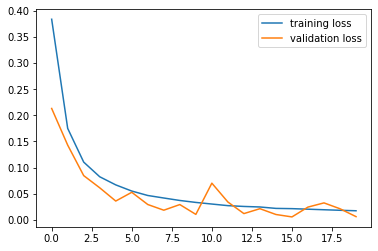

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model1.history['loss'], label='training loss')
plt.plot(model1.history['val_loss'], label='validation loss')
plt.legend()
plt.savefig('validationLossANN.pdf')
plt.show()

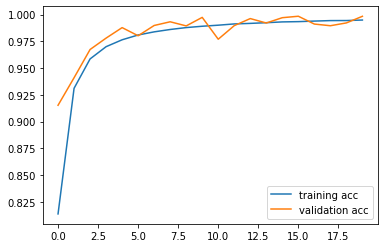

In [ ]:
# plot the accuracy
plt.plot(model1.history['accuracy'], label='training acc')
plt.plot(model1.history['val_accuracy'], label='validation acc')
plt.legend()
plt.savefig('validationACCANN.pdf')
plt.show()


In [ ]:
model.save_weights('/content/drive/MyDrive/Thesis Final Codes/checkpoints/FinalCheckpoint_995percentV2')

In [ ]:
model1 = model.load_weights('/content/drive/MyDrive/Thesis Final Codes/checkpoints/FinalCheckpoint_995percent')

In [ ]:
model2 = keras.models.Sequential(model.layers[:-1])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 418)               26334     
                                                                 
 dense_1 (Dense)             (None, 32)                13408     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)               

In [ ]:
features = model2.predict(train_samples)

In [ ]:
features.shape

(369101, 16)

In [ ]:
features

array([[ 0.       ,  0.       ,  0.       , ...,  1.5880917,  0.       ,
         0.       ],
       [ 8.363326 ,  7.90938  ,  0.       , ...,  0.       ,  0.       ,
         5.6425653],
       [ 5.313506 ,  5.0465674,  0.       , ...,  0.       ,  0.       ,
         3.5824637],
       ...,
       [15.030336 , 14.346928 ,  0.       , ...,  0.       ,  0.       ,
        10.453796 ],
       [ 0.       ,  0.       ,  0.       , ...,  8.660603 ,  0.       ,
         0.       ],
       [ 3.3633966,  3.2097573,  0.       , ...,  0.       ,  0.       ,
         2.3131182]], dtype=float32)

In [ ]:
features = scaler.fit_transform(features)

In [ ]:
test_features = model2.predict(test_samples)

In [ ]:
test_features.shape

(158187, 16)

In [ ]:
test_features = scaler.fit_transform(test_features)

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
t0=time.time()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(features, y_train)
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(dt.score(features, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(dt.score(test_features, y_test)))
y_pred = dt.predict(test_features)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_dt = time.time() - t0
print("Time taken for DT Classifier:{}".format(tt_dt))
accuracy_dt = accuracy_score(y_test, y_pred)


Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.95
              precision    recall  f1-score   support

           0     0.9512    0.9668    0.9590     92132
           1     0.9526    0.9309    0.9416     66055

    accuracy                         0.9518    158187
   macro avg     0.9519    0.9488    0.9503    158187
weighted avg     0.9518    0.9518    0.9517    158187

Time taken for DT Classifier:12.104492664337158


[[89177  2955]
 [ 4800 61255]]


<Figure size 720x720 with 0 Axes>

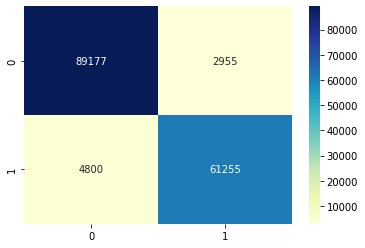

<Figure size 720x720 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("DT_confmatrix.pdf")
plt.figure(figsize=(10,10))


0.9482255704588273


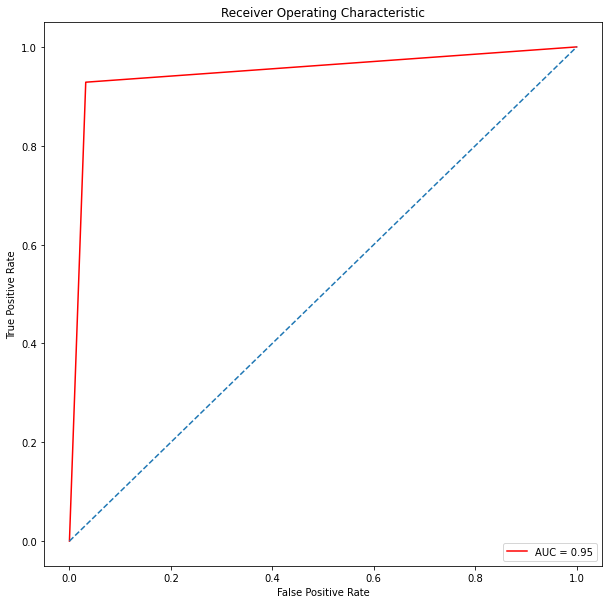

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_DT.pdf")

In [ ]:
t0 = time.time()
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=-1).fit(features, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(clf.score(features, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(clf.score(test_features, y_test)))
y_pred = clf.predict(test_features)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_knn = time.time() - t0
print("Time taken for K-NN Classifier:{}".format(tt_knn))
accuracy_knn = accuracy_score(y_test, y_pred)

KeyboardInterrupt: ignored

In [ ]:
clf.score(features,y_train)

[[85357  6775]
 [ 6258 59797]]


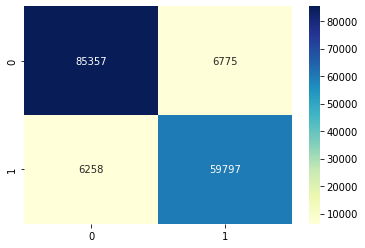

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.figure()
plt.show()

0.9158624855381298


Text(0.5, 0, 'False Positive Rate')

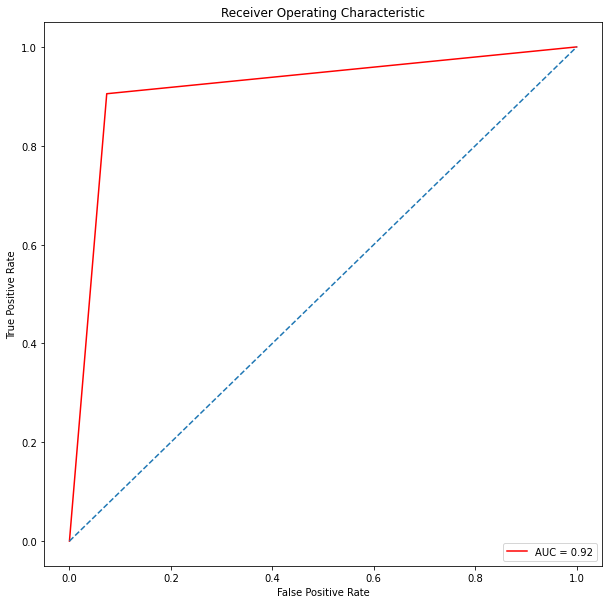

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
t0 = time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(features, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(features, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(test_features, y_test)))
y_pred = clf.predict(test_features)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_rf = time.time() - t0
print("Time taken for RF Classifier:{}".format(tt_rf))
accuracy_rf = accuracy_score(y_test, y_pred)

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.96
              precision    recall  f1-score   support

           0     0.9541    0.9727    0.9633     92132
           1     0.9609    0.9348    0.9476     66055

    accuracy                         0.9569    158187
   macro avg     0.9575    0.9537    0.9555    158187
weighted avg     0.9569    0.9569    0.9568    158187

Time taken for RF Classifier:97.74040865898132


[[89618  2514]
 [ 4309 61746]]


<Figure size 432x288 with 0 Axes>

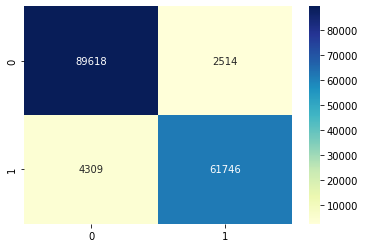

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("Conf_RF.pdf")
plt.figure()



0.9537397731708068


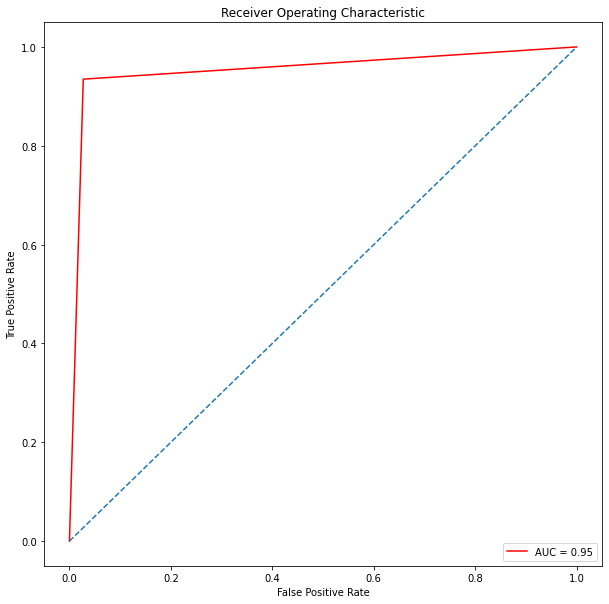

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_RF.pdf")

In [ ]:
t0 = time.time()
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(features, y_train)
print('Accuracy of NB classifier on training set: {:.2f}'
     .format(nb.score(features, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(nb.score(test_features, y_test)))
y_pred = nb.predict(test_features)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_nb = time.time() - t0
print("Time taken for NB Classifier:{}".format(tt_nb))
accuracy_nb = accuracy_score(y_test, y_pred)

Accuracy of NB classifier on training set: 1.00
Accuracy of NB classifier on test set: 0.96
              precision    recall  f1-score   support

           0     0.9646    0.9625    0.9635     92132
           1     0.9478    0.9507    0.9492     66055

    accuracy                         0.9575    158187
   macro avg     0.9562    0.9566    0.9564    158187
weighted avg     0.9576    0.9575    0.9575    158187

Time taken for NB Classifier:0.8003315925598145


[[88674  3458]
 [ 3259 62796]]


<Figure size 432x288 with 0 Axes>

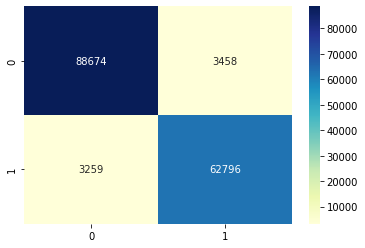

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("Conf_NB.pdf")
plt.figure()



0.9565646110864692


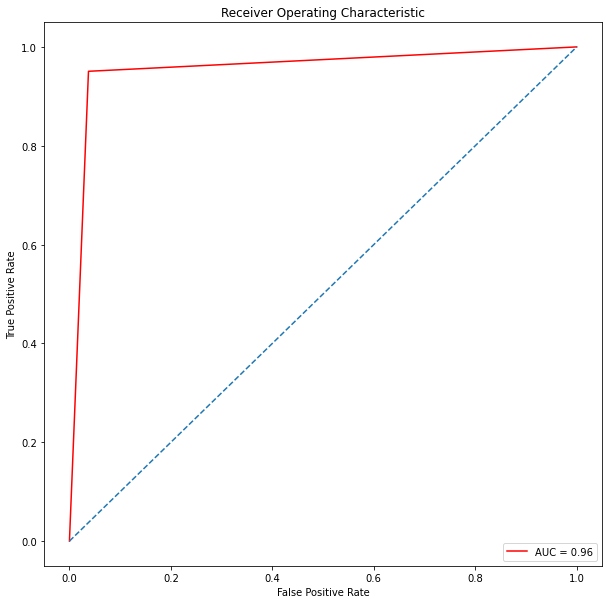

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_NB.pdf")

# Logistic **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
t0 = time.time()
clf = LogisticRegression(random_state=0)
clf.fit(features, y_train)
# make predictions for test data
y_pred = clf.predict(test_features)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(clf.score(features, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(clf.score(test_features, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_lr = time.time() - t0
print("Time taken for Logistic Regression Classifier:{}".format(tt_lr))
accuracy_lr = accuracy_score(y_test, y_pred)

Accuracy of Logistic Regression classifier on training set: 1.00
Accuracy of Logistic Regression classifier on test set: 0.95
              precision    recall  f1-score   support

           0     0.9740    0.9472    0.9604     92132
           1     0.9290    0.9647    0.9465     66055

    accuracy                         0.9545    158187
   macro avg     0.9515    0.9559    0.9534    158187
weighted avg     0.9552    0.9545    0.9546    158187

Time taken for Logistic Regression Classifier:1.9775612354278564


[[87264  4868]
 [ 2333 63722]]


<Figure size 432x288 with 0 Axes>

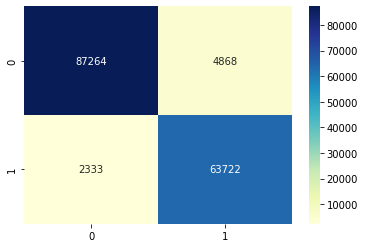

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("Conf_LR.pdf")
plt.figure()



0.9559218570803043


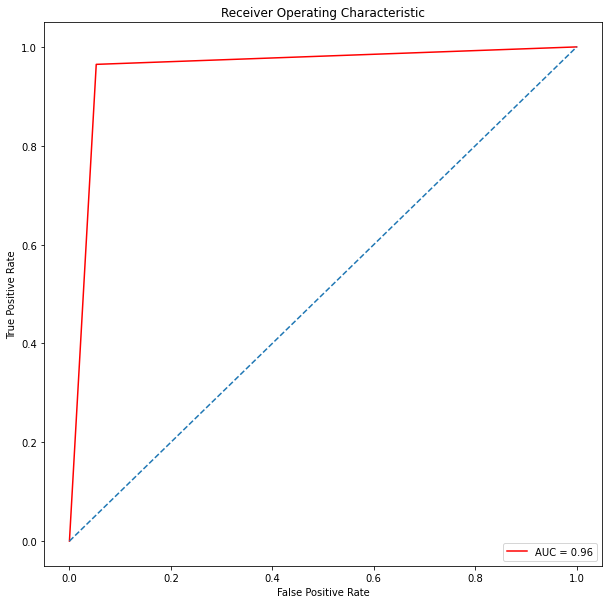

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_LR.pdf")

# **XGboosting ADDed**

In [ ]:
t0 = time.time()
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(features, y_train)
# make predictions for test data
y_pred = xg.predict(test_features)
print('Accuracy of XGboosting classifier on training set: {:.2f}'
     .format(xg.score(features, y_train)))
print('Accuracy of XGboosting classifier on test set: {:.2f}'
     .format(xg.score(test_features, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_xg = time.time() - t0
print("Time taken for XGboostig Classifier:{}".format(tt_xg))
accuracy_xg = accuracy_score(y_test, y_pred)

Accuracy of XGboosting classifier on training set: 1.00
Accuracy of XGboosting classifier on test set: 0.96
              precision    recall  f1-score   support

           0     0.9563    0.9704    0.9633     92132
           1     0.9578    0.9382    0.9479     66055

    accuracy                         0.9569    158187
   macro avg     0.9571    0.9543    0.9556    158187
weighted avg     0.9570    0.9569    0.9569    158187

Time taken for XGboostig Classifier:37.069464921951294


[[89404  2728]
 [ 4084 61971]]


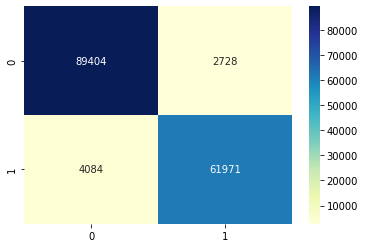

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("Conf_XGB.pdf")
plt.figure()

plt.show()


0.9542815221990159


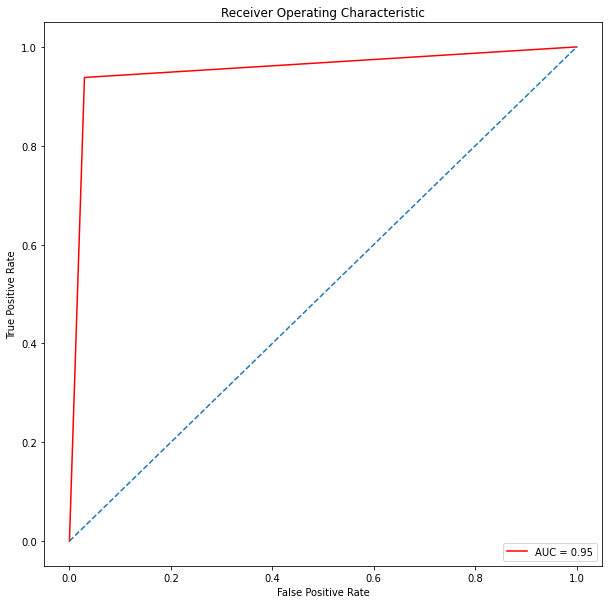

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_XGB.pdf")

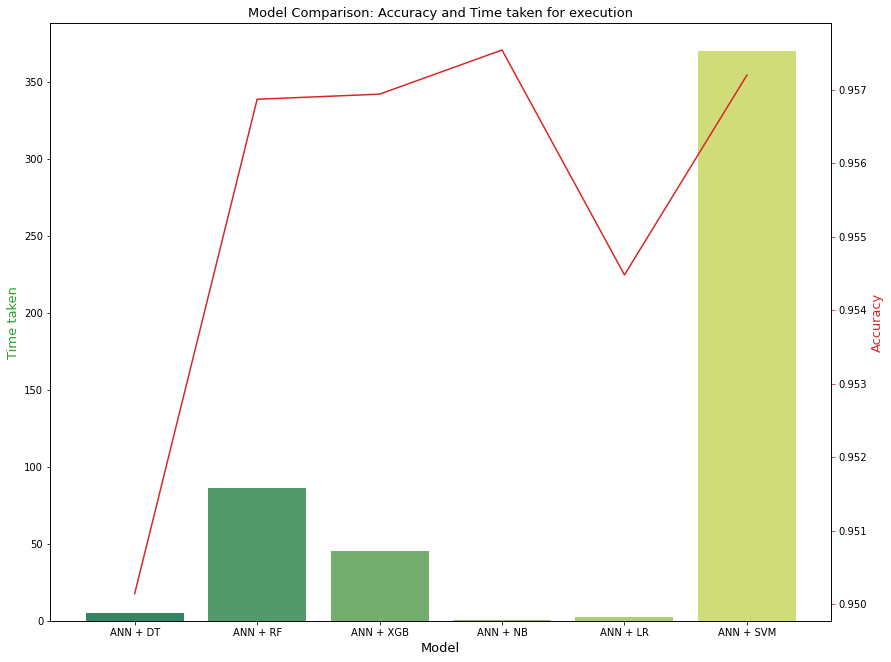

In [ ]:
#Plot of Accuracy vs Time and model
accuracy_scores = [accuracy_dt, accuracy_rf, accuracy_xg, accuracy_nb, accuracy_lr,accuracy_svm]
tt = [tt_dt, tt_rf, tt_xg, tt_nb, tt_lr,tt_svm]

model_data = {'Model': ['ANN + DT','ANN + RF','ANN + XGB','ANN + NB',"ANN + LR","ANN + SVM"],
              'Accuracy': accuracy_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,11))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.savefig("CompareHybrid.pdf")

In [ ]:
plt.savefig("CompareHybrid.pdf")

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear', random_state=21,shrinking=True, probability=True,max_iter = 1000).fit(features, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(clf.score(features, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf.score(test_features, y_test)))

KeyboardInterrupt: ignored

In [ ]:
t0 = time.time()
from sklearn import svm

clf = svm.SVC(kernel='rbf', random_state=42, gamma=100, C=10, shrinking=True, tol=1.000, max_iter = 500, probability= True).fit(features, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(clf.score(features, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf.score(test_features, y_test)))
y_pred = clf.predict(test_features)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_svm = time.time() - t0
print("Time taken for SVM Classifier:{}".format(tt_svm))
accuracy_svm = accuracy_score(y_test, y_pred)
#kernel='rbf', random_state=21, gamma=10, C=100, shrinking=True, tol=1.000, max_iter = 1000

KeyboardInterrupt: ignored

In [ ]:
t0 = time.time()
from sklearn import svm

clf = svm.SVC(kernel='rbf', random_state=42, gamma=100, C=10, shrinking=True, tol=1.000, max_iter = 750, probability= True).fit(features, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(clf.score(features, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf.score(test_features, y_test)))
y_pred = clf.predict(test_features)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))
tt_svm = time.time() - t0
print("Time taken for SVM Classifier:{}".format(tt_svm))
accuracy_svm = accuracy_score(y_test, y_pred)

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.96
              precision    recall  f1-score   support

           0     0.9572    0.9698    0.9635     92132
           1     0.9571    0.9396    0.9483     66055

    accuracy                         0.9572    158187
   macro avg     0.9572    0.9547    0.9559    158187
weighted avg     0.9572    0.9572    0.9571    158187

Time taken for SVM Classifier:403.0845365524292


[[89353  2779]
 [ 3992 62063]]


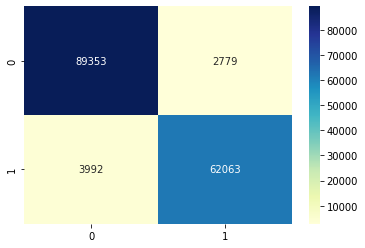

<Figure size 432x288 with 0 Axes>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",fmt="d")
plt.savefig("Conf_SVM.pdf")
plt.figure()

plt.show()


0.9547011347730019


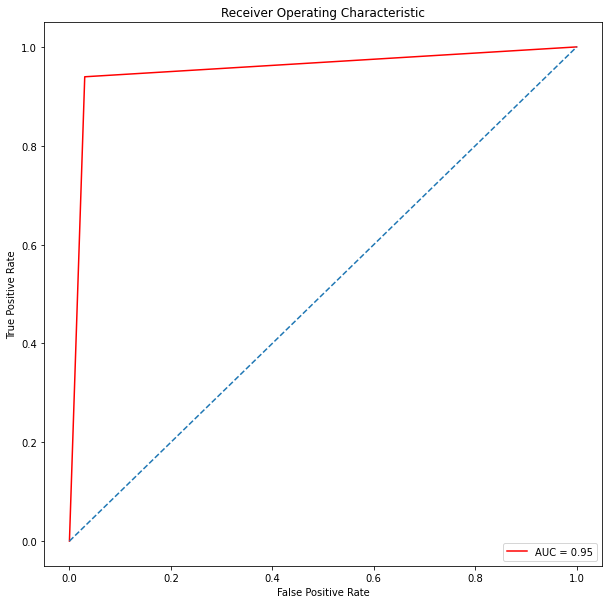

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_SVM.pdf")